In [1]:
# imports
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

warnings.filterwarnings('ignore')

C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
df=pd.read_csv('data/Loan_Default.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [39]:
df_LTV=df[df['LTV'].notna()]
df_int=df_LTV[df['Interest_rate_spread'].notna()]
df_negamort=df_int[df['Neg_ammortization'].notna()]
df_income=df_negamort[df_negamort['income'].notna()]
df_preapprove=df_income[df_income['approv_in_adv'].notna()]
df_upfront=df_preapprove[df_preapprove['Upfront_charges'].notna()]

<AxesSubplot:xlabel='loan_limit', ylabel='Count'>

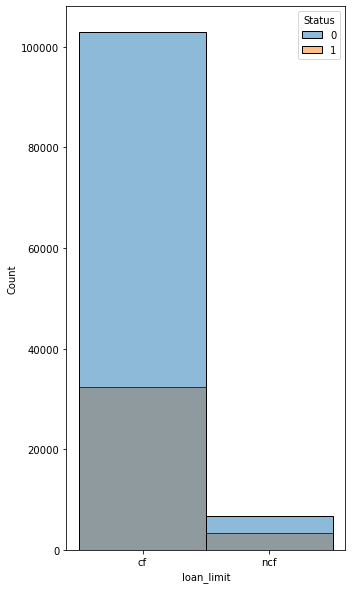

In [56]:
df_test_loan_limit=df[df['loan_limit'].notna()]
df_test_loan_limit['Status']=df_test_loan_limit['Status'].astype('category')
f,ax=plt.subplots(figsize=(5,10))
sns.histplot(ax=ax,data=df_test_loan_limit,x='loan_limit',hue='Status')

In [57]:
df_cleaned=df_upfront[df_upfront['loan_limit'].notna()]

In [97]:
df_int_test2=df_int_test[df_int_test['rate_of_interest'].isna()]
df_int_test2[['Status','rate_of_interest','Interest_rate_spread','LTV','Neg_ammortization','income','approv_in_adv','Upfront_charges']].describe()

,Status,rate_of_interest,Interest_rate_spread,LTV,income,Upfront_charges
count,21343.0,0.0,0.0,21343.000000,20319.000000,0.0
mean,1.0,NaN,NaN,76.229927,6035.352133,NaN
std,0.0,NaN,NaN,28.676843,7824.958132,NaN
min,1.0,NaN,NaN,0.967478,0.000000,NaN
25%,1.0,NaN,NaN,64.204545,2880.000000,NaN
50%,1.0,NaN,NaN,79.336735,4620.000000,NaN
75%,1.0,NaN,NaN,90.938865,7260.000000,NaN
max,1.0,NaN,NaN,2956.250000,578580.000000,NaN


In [95]:
df_int_test[['Status','rate_of_interest','Interest_rate_spread','LTV','Neg_ammortization','income','approv_in_adv','Upfront_charges']].describe()

,Status,rate_of_interest,Interest_rate_spread,LTV,income,Upfront_charges
count,21543.0,200.000000,0.0,21543.000000,20319.000000,153.000000
mean,1.0,4.350500,NaN,76.291468,6035.352133,1565.237974
std,0.0,0.495546,NaN,28.580217,7824.958132,2299.820513
min,1.0,3.125000,NaN,0.967478,0.000000,0.000000
25%,1.0,3.990000,NaN,64.273172,2880.000000,0.000000
50%,1.0,4.312500,NaN,79.362416,4620.000000,687.850000
75%,1.0,4.750000,NaN,90.948276,7260.000000,2310.750000
max,1.0,5.500000,NaN,2956.250000,578580.000000,15584.000000


In [96]:
df_int_test=df_LTV[df_LTV['Status']==1]
df_int_test1=df_int_test[df_int_test['rate_of_interest'].notna()]
df_int_test1[['Status','rate_of_interest','Interest_rate_spread','LTV','Neg_ammortization','income','approv_in_adv','Upfront_charges']].describe()

,Status,rate_of_interest,Interest_rate_spread,LTV,income,Upfront_charges
count,200.0,200.000000,0.0,200.000000,0.0,153.000000
mean,1.0,4.350500,NaN,82.858844,NaN,1565.237974
std,0.0,0.495546,NaN,13.558762,NaN,2299.820513
min,1.0,3.125000,NaN,17.225610,NaN,0.000000
25%,1.0,3.990000,NaN,76.890851,NaN,0.000000
50%,1.0,4.312500,NaN,84.420290,NaN,687.850000
75%,1.0,4.750000,NaN,92.272245,NaN,2310.750000
max,1.0,5.500000,NaN,99.623116,NaN,15584.000000


In [99]:
df_int_test3=df_int_test[df_int_test['income'].notna()]
df_int_test3[['Status','rate_of_interest','Interest_rate_spread','LTV','Neg_ammortization','income','approv_in_adv','Upfront_charges']].describe()

,Status,rate_of_interest,Interest_rate_spread,LTV,income,Upfront_charges
count,20319.0,0.0,0.0,20319.000000,20319.000000,0.0
mean,1.0,NaN,NaN,75.416937,6035.352133,NaN
std,0.0,NaN,NaN,20.895836,7824.958132,NaN
min,1.0,NaN,NaN,0.967478,0.000000,NaN
25%,1.0,NaN,NaN,63.257720,2880.000000,NaN
50%,1.0,NaN,NaN,78.716216,4620.000000,NaN
75%,1.0,NaN,NaN,90.071770,7260.000000,NaN
max,1.0,NaN,NaN,263.541667,578580.000000,NaN


In [91]:
df_int["Credit_Worthiness"].value_counts()

l1    107713
l2      4316
Name: Credit_Worthiness, dtype: int64

In [93]:
df_int['credit_type'].value_counts()

CIB     40541
CRIF    36773
EXP     34714
EQUI        1
Name: credit_type, dtype: int64

In [58]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98309 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID                         98309 non-null  int64   
 1   year                       98309 non-null  int64   
 2   loan_limit                 98309 non-null  object  
 3   Gender                     98309 non-null  object  
 4   approv_in_adv              98309 non-null  object  
 5   loan_type                  98309 non-null  object  
 6   loan_purpose               98211 non-null  object  
 7   Credit_Worthiness          98309 non-null  object  
 8   open_credit                98309 non-null  object  
 9   business_or_commercial     98309 non-null  object  
 10  loan_amount                98309 non-null  int64   
 11  rate_of_interest           98309 non-null  float64 
 12  Interest_rate_spread       98309 non-null  float64 
 13  Upfront_charges            983

<AxesSubplot:xlabel='loan_purpose', ylabel='Count'>

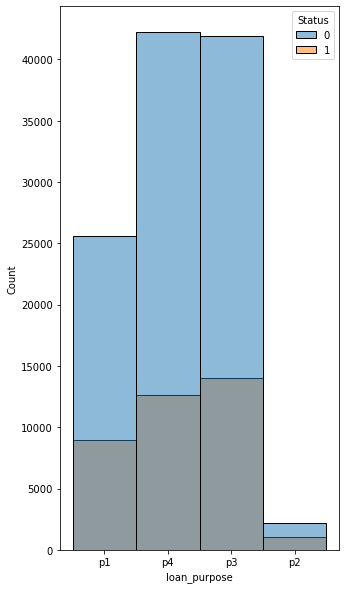

In [62]:
df_test_loan_purpose=df[df['loan_purpose'].notna()]
df_test_loan_purpose['Status']=df_test_loan_purpose['Status'].astype('category')
f,ax=plt.subplots(figsize=(5,10))
sns.histplot(ax=ax,data=df_test_loan_purpose,x='loan_purpose',hue='Status')

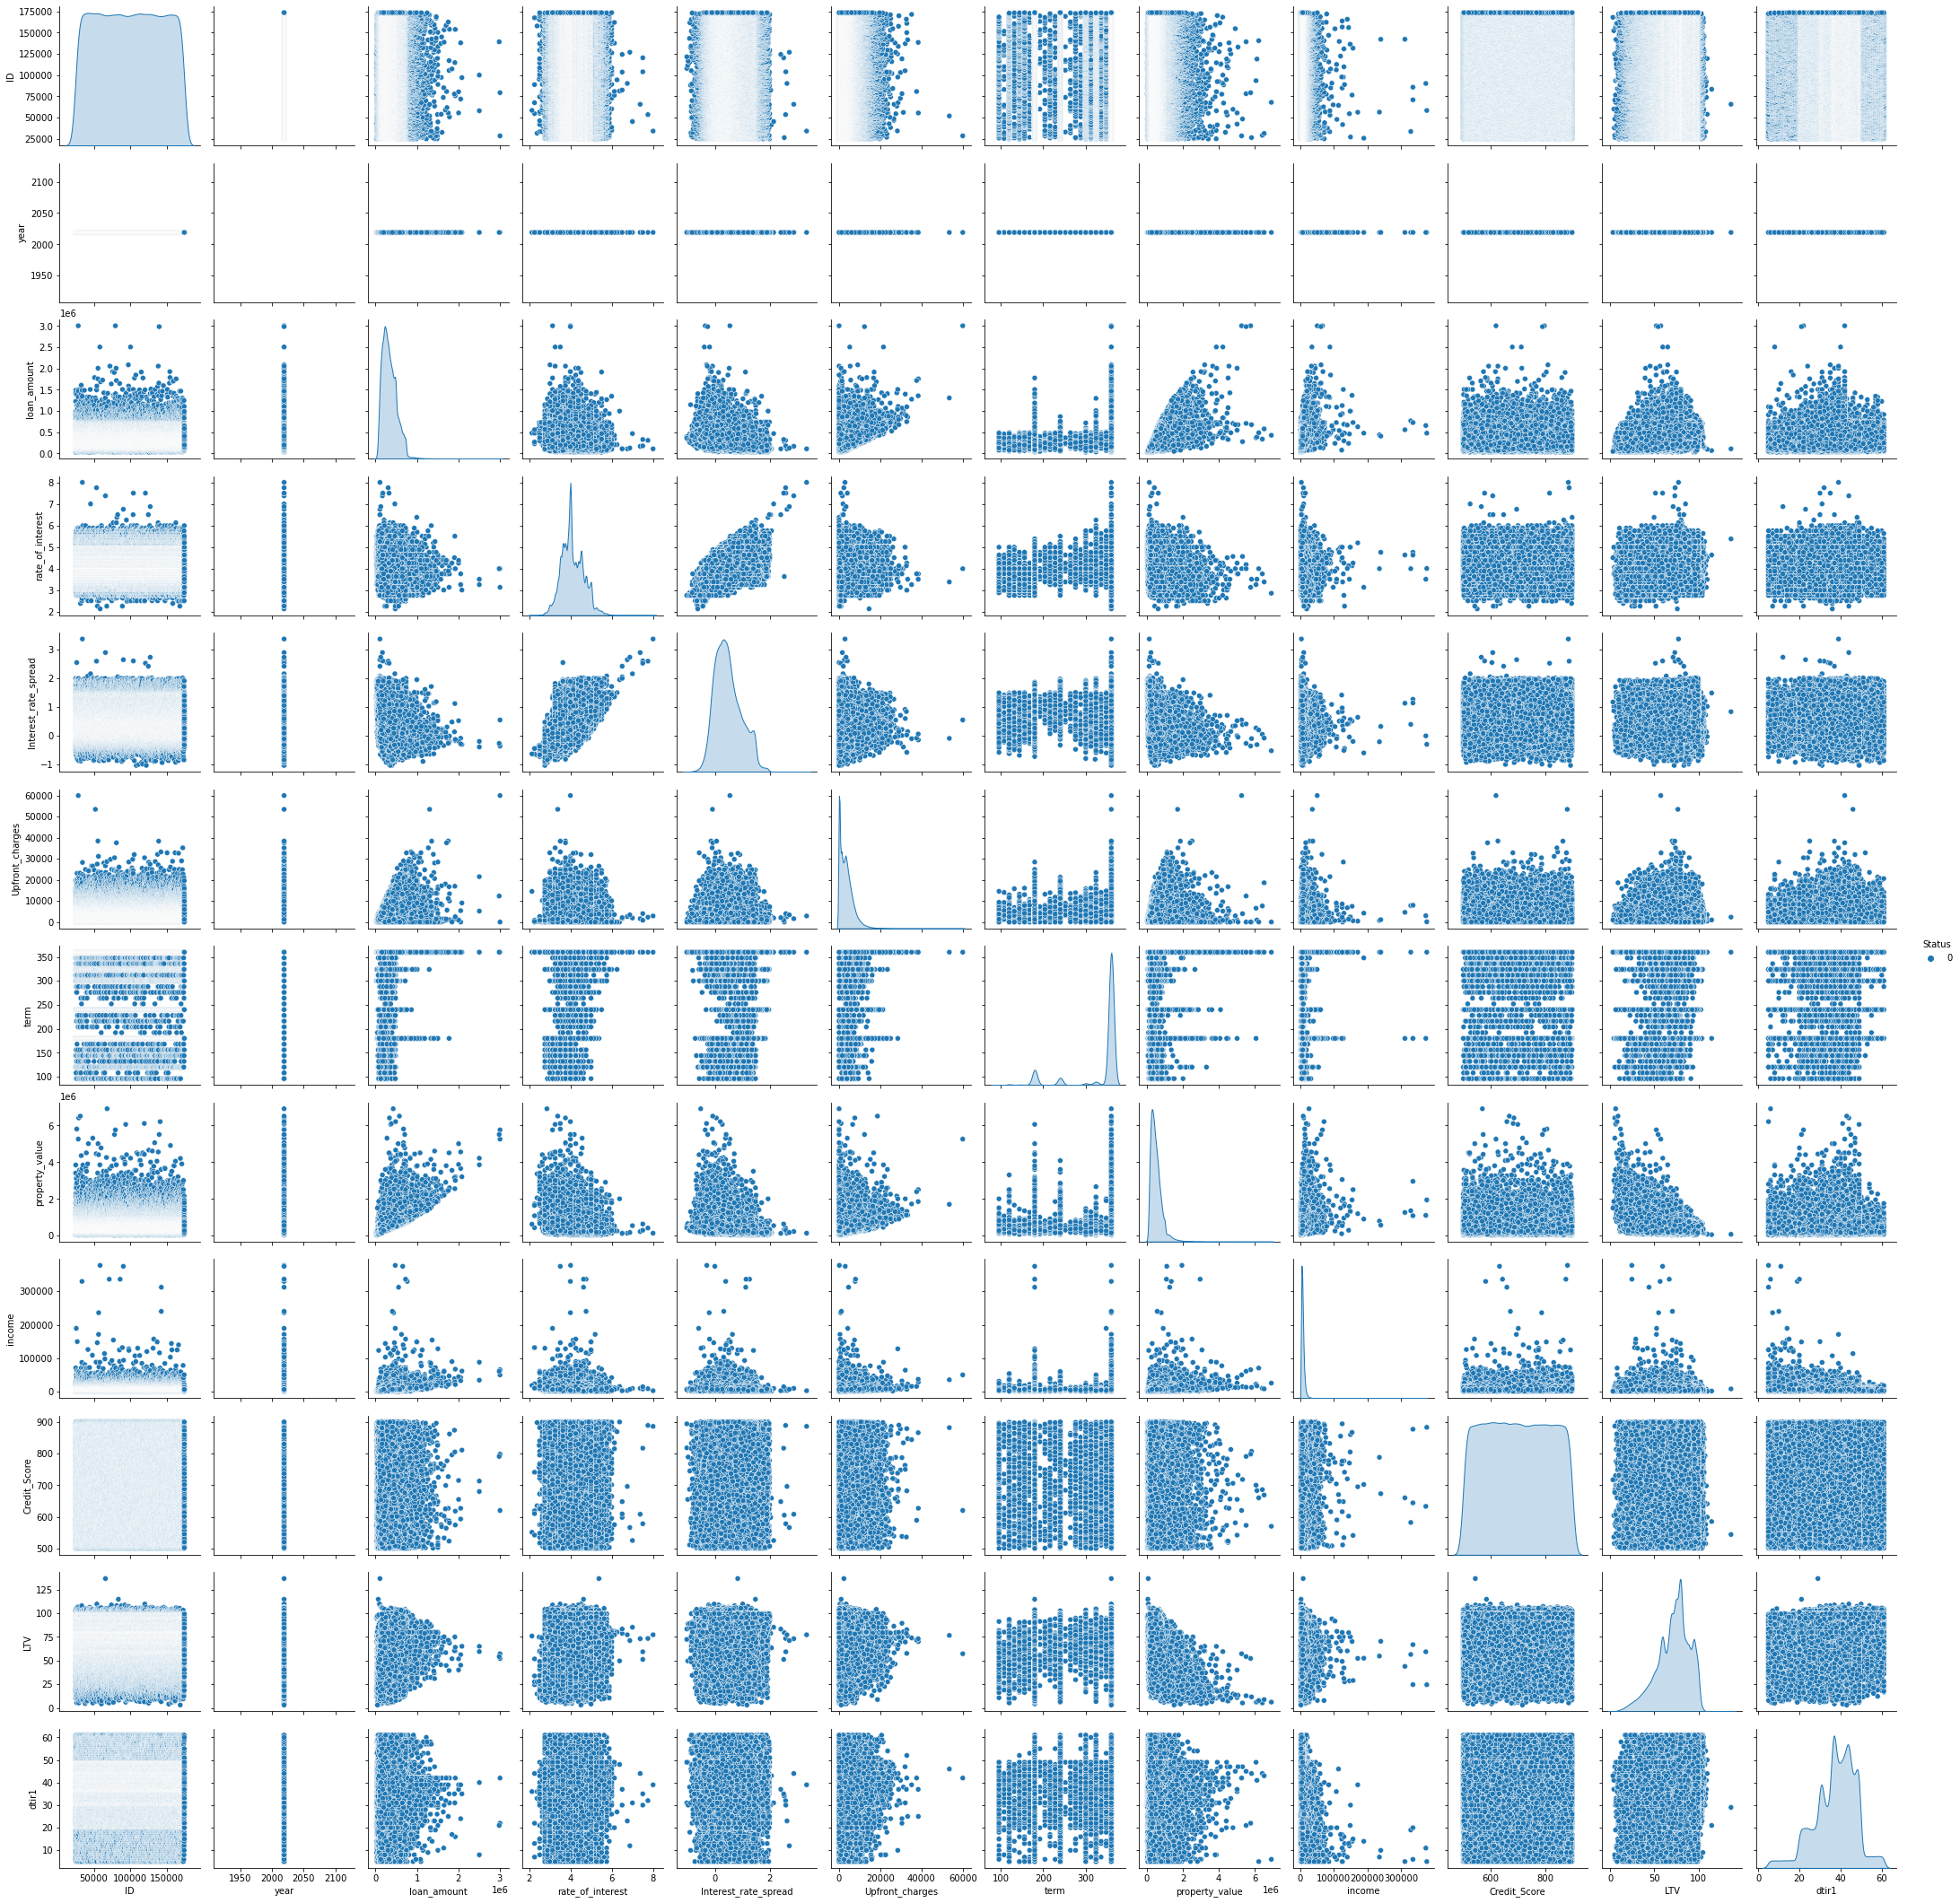

In [65]:
sns.pairplot(df_cleaned, hue = 'Status')